In [3]:
%matplotlib inline
import spartan2.spartan as st

In [5]:
# set the computing engine
st.config(st.engine.SINGLEMACHINE)

In [6]:
# load graph data
data = st.loadTensor(name = "example_graph", path = "inputData/", col_ids = ["uid", "oid", "rate"],  col_types = [int, int, int])

In [7]:
# count degree
Du, Dv = st.bidegree(data)

In [8]:
# create a anomaly detection model
emmodel = st.anomaly_detection.create(data, st.ad_policy.EAGLEMINE, "my_eaglemine_model")
emmodel.setbipartite(True)

total shape: (33374, 2), valid samples:33352
Histogram Info:
	 Histogram shape: [66, 71]
	 #points: 33352, #mode: 2
Graph feature to histogram done!
histogram: temp/histogram.out;  hode2pos: temp/node2hcel.out;  hpos_avgfeat: temp/hcel2avgfeat.out
EagleMine algorithm
*****************
[0]. initialization and loading
*****************
[1]. WaterLevelTree

Construct raw-tree.
Info: maximum tree level: 10.2
Info: Level-Tree build done!

Refine tree structure.

+++++++++ 
a). tree contract
Info: Level-tree contract done!
Info: Contract level-tree:
Level tree basic information:
#node: 3, #level: 2
(node id): {@level, parent node, #childs, #elements}
|---- (0): 1.0, -1, [28, 29], 299 |-
    |---- (28): 7.799999999999999, 0, None, 5 |-
    |---- (29): 7.799999999999999, 0, None, 30 |-
dump done!

+++++++++ 
b). tree prune
Info: Level-tree prune done!
Info: Pruned level-tree:
Level tree basic information:
#node: 1, #level: 2
(node id): {@level, parent node, #childs, #elements}
|---- (0): 1.0, 

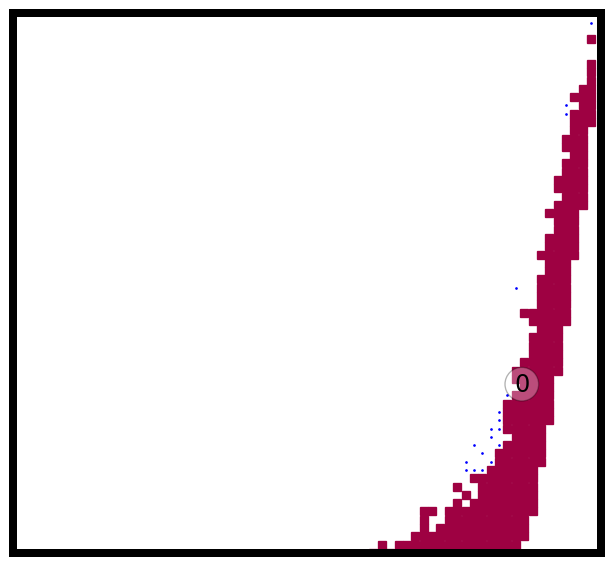

In [9]:
# run the eaglemine model
emmodel.run(emmodel.U, Du)

total shape: (65911, 2), valid samples:65889
Histogram Info:
	 Histogram shape: [61, 71]
	 #points: 65889, #mode: 2
Graph feature to histogram done!
histogram: temp/histogram.out;  hode2pos: temp/node2hcel.out;  hpos_avgfeat: temp/hcel2avgfeat.out
EagleMine algorithm
*****************
[0]. initialization and loading
*****************
[1]. WaterLevelTree

Construct raw-tree.
Info: maximum tree level: 11.399999999999999
Info: Level-Tree build done!

Refine tree structure.

+++++++++ 
a). tree contract
Info: Level-tree contract done!
Info: Contract level-tree:
Level tree basic information:
#node: 8, #level: 3
(node id): {@level, parent node, #childs, #elements}
|---- (0): 1.0, -1, None, 8 |-
|---- (1): 1.0, -1, None, 10 |-
|---- (2): 1.0, -1, [61, 62, 63], 153 |-
    |---- (61): 8.2, 2, None, 5 |-
    |---- (62): 8.2, 2, None, 5 |-
    |---- (63): 8.2, 2, [65, 66], 36 |-
        |---- (65): 8.399999999999999, 63, None, 5 |-
        |---- (66): 8.399999999999999, 63, None, 28 |-
dump done!

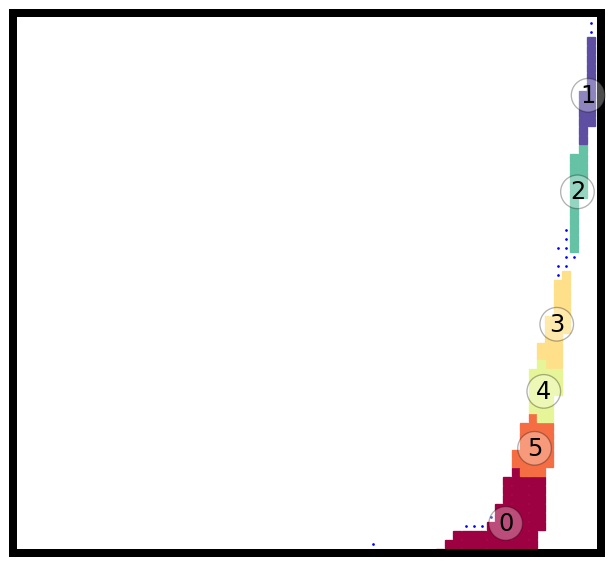

In [10]:
emmodel.run(emmodel.V, Dv)

In [11]:
A, B = emmodel.nodes(n=0)

In [12]:
g = st.subgraph(data, A, B)